In [5]:
# 1. Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from collections import Counter
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from wordcloud import WordCloud

In [10]:
# Setting display options
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 20)
pd.set_option('display.width', 1000)

In [11]:
# Downloading NLTK resources
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\arpit\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\arpit\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\arpit\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [14]:
# 2. Load the dataset
file_path = 'bookdata.csv'  
df = pd.read_csv(file_path)

In [34]:
# 3. Exploratory Data Analysis

# Display basic information
print(f"Dataset shape: {df.shape}")
print(df.columns.tolist())

Dataset shape: (4400, 20)
['Unnamed: 0', 'isbn', 'title', 'series_title', 'series_release_number', 'authors', 'publisher', 'language', 'description', 'num_pages', 'format', 'genres', 'publication_date', 'rating_score', 'num_ratings', 'num_reviews', 'current_readers', 'want_to_read', 'price', 'url']


In [28]:
# Display sample data
print("\nSample data:")
df.head(3)


Sample data:


,Unnamed: 0,isbn,title,series_title,series_release_number,authors,publisher,language,description,num_pages,format,genres,publication_date,rating_score,num_ratings,num_reviews,current_readers,want_to_read,price,url
0,0,9780689830594,Summer Story,Brambly Hedge,2,Jill Barklem,Atheneum,English,It was such a hot summer. The sky was deep blu...,32,Hardcover,"['Picture Books', 'Childrens', 'Fiction', 'Ani...","January 1, 1980",4.45,1017.0,74.0,7.0,512.0,3.49,https://www.goodreads.com/book/show/421572.Sum...
1,1,9780375704970,The Lake of Darkness,NaN,NaN,Ruth Rendell,Vintage Crime/Black Lizard,English,Martin Urban is a quiet bachelor with a comfor...,210,Paperback,"['Mystery', 'Fiction', 'Crime', 'Thriller', 'B...","January 1, 1980",3.76,1388.0,114.0,77.0,623.0,4.99,https://www.goodreads.com/book/show/83394.The_...
2,2,9780345446671,Beyond the Blue Event Horizon,Heechee Saga,2,Frederik Pohl,Ballantine Books,English,"In Book Two of the Heechee Saga, Robinette Bro...",336,Paperback,"['Science Fiction', 'Fiction', 'Space Opera', ...","January 1, 1980",3.95,13307.0,339.0,181.0,3961.0,11.99,https://www.goodreads.com/book/show/373399.Bey...


In [30]:
# Check for missing values
missing_values = df.isnull().sum()
print("\nMissing values per column:")
print(missing_values[missing_values > 0])


Missing values per column:
isbn                      594
series_title             2132
series_release_number    2144
publisher                 116
language                   26
description                 2
num_pages                  21
format                     35
publication_date            1
current_readers           104
want_to_read               39
price                     233
dtype: int64


In [32]:
# Basic statistics
print("\nBasic statistics for numerical columns:")
df.describe()


Basic statistics for numerical columns:


,Unnamed: 0,rating_score,num_ratings,num_reviews,current_readers,want_to_read,price
count,4400.000000,4400.00000,4.400000e+03,4400.000000,4296.000000,4.361000e+03,4167.000000
mean,2199.500000,4.02337,1.476433e+05,8887.657045,5311.375698,8.922948e+04,8.828898
std,1270.314922,0.24228,4.015620e+05,18632.823791,12639.499205,1.722125e+05,4.505692
min,0.000000,2.97000,4.000000e+00,0.000000,2.000000,3.000000e+00,0.000000
25%,1099.750000,3.87000,1.372150e+04,743.000000,391.750000,6.826000e+03,6.990000
50%,2199.500000,4.03000,4.415300e+04,2545.500000,1240.000000,2.400000e+04,9.990000
75%,3299.250000,4.18000,1.217560e+05,8383.500000,4231.250000,9.350000e+04,11.990000
max,4399.000000,4.81000,9.911798e+06,259109.000000,224000.000000,2.000000e+06,29.990000


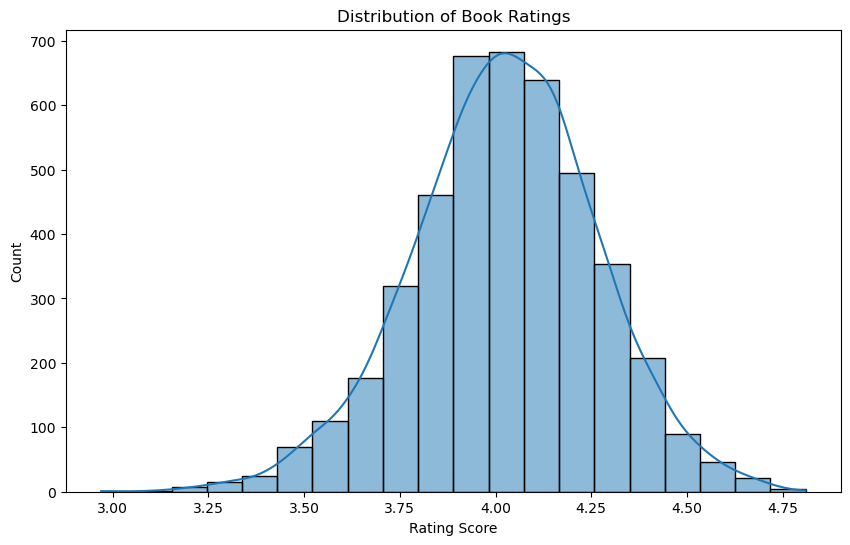

In [40]:
# Distribution of ratings
plt.figure(figsize=(10, 6))
sns.histplot(df['rating_score'], bins=20, kde=True)
plt.title('Distribution of Book Ratings')
plt.xlabel('Rating Score')
plt.ylabel('Count')
plt.show()

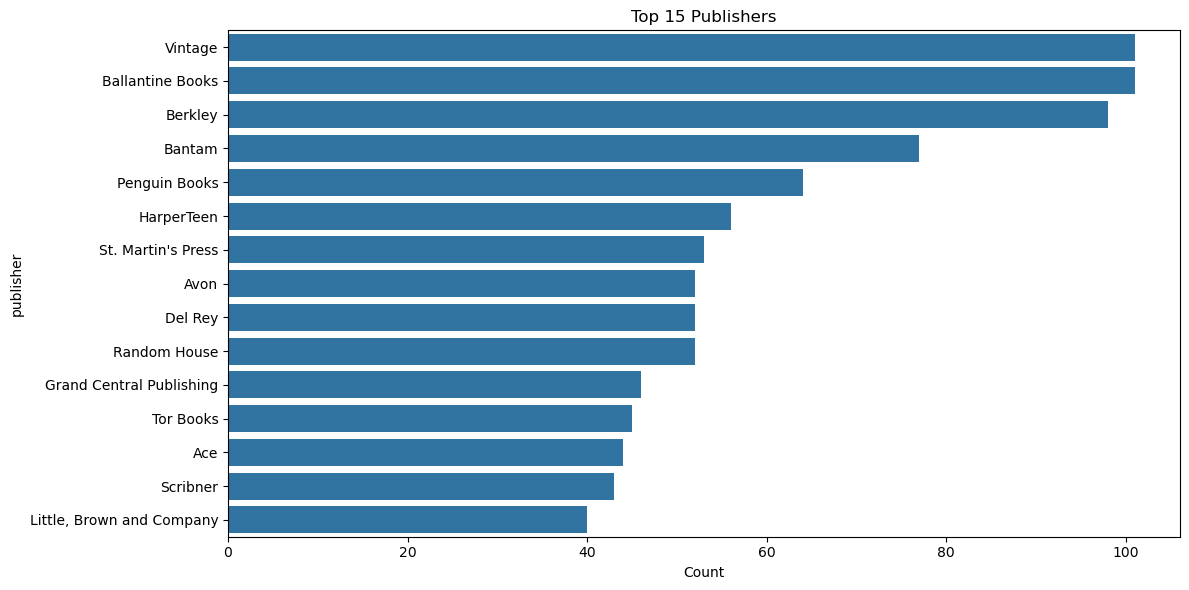

In [42]:
# Top publishers
top_publishers = df['publisher'].value_counts().head(15)
plt.figure(figsize=(12, 6))
sns.barplot(x=top_publishers.values, y=top_publishers.index)
plt.title('Top 15 Publishers')
plt.xlabel('Count')
plt.tight_layout()
plt.show()

In [62]:
# Import necessary libraries
from collections import Counter

# Function to extract and process genres
def extract_genres(genre_string):
    if not isinstance(genre_string, str):  # Check if the value is a string
        return []
    # Split by commas and clean up whitespace
    genres = [g.strip() for g in genre_string.split(',')]
    return genres

# Apply function to create a list of genres for each book
df['genres_list'] = df['genres'].apply(extract_genres)  # Use 'genres' instead of 'Genres'

# Flatten the list of genres and count occurrences
all_genres = [genre for sublist in df['genres_list'] for genre in sublist]
genre_counts = Counter(all_genres)

# Display the most common genres
print("Most common genres:")
print(genre_counts.most_common(20))  # Print top 20 genres

Most common genres:
[("'Fiction'", 2473), ("'Romance'", 954), ("'Contemporary'", 947), ("'Fantasy'", 819), ("['Fantasy'", 800), ("['Fiction'", 792), ("'Young Adult'", 679), ("'Audiobook'", 674), ("'Historical Fiction'", 514), ("'Historical'", 514), ("'Mystery'", 507), ("'Thriller'", 502), ("'Crime'", 456), ("['Romance'", 447), ("'Paranormal'", 428), ("['Mystery'", 427), ("'Mystery Thriller'", 421), ("'Adult'", 421), ("'Contemporary Romance'", 372), ("'Adult']", 331)]


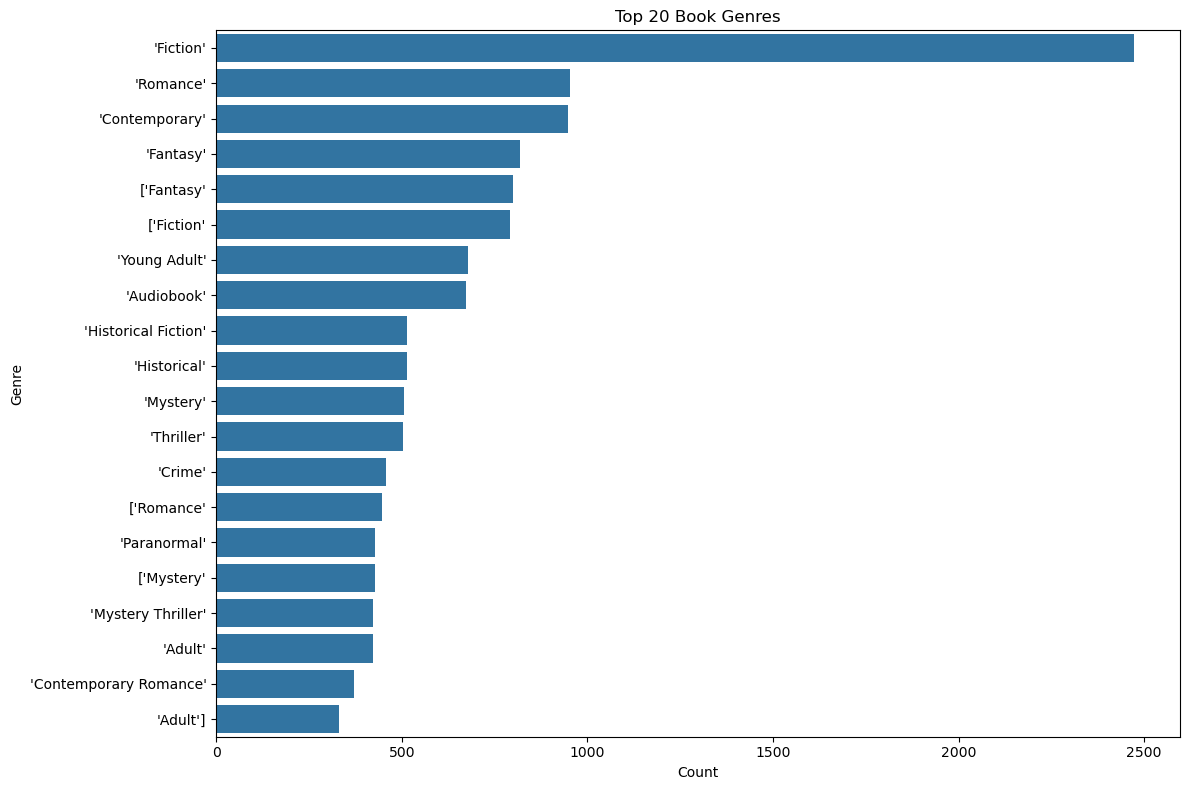

In [60]:
# Plot top genres
top_genres = pd.DataFrame(genre_counts.most_common(20), columns=['Genre', 'Count'])
plt.figure(figsize=(12, 8))
sns.barplot(data=top_genres, x='Count', y='Genre')
plt.title('Top 20 Book Genres')
plt.tight_layout()
plt.show()

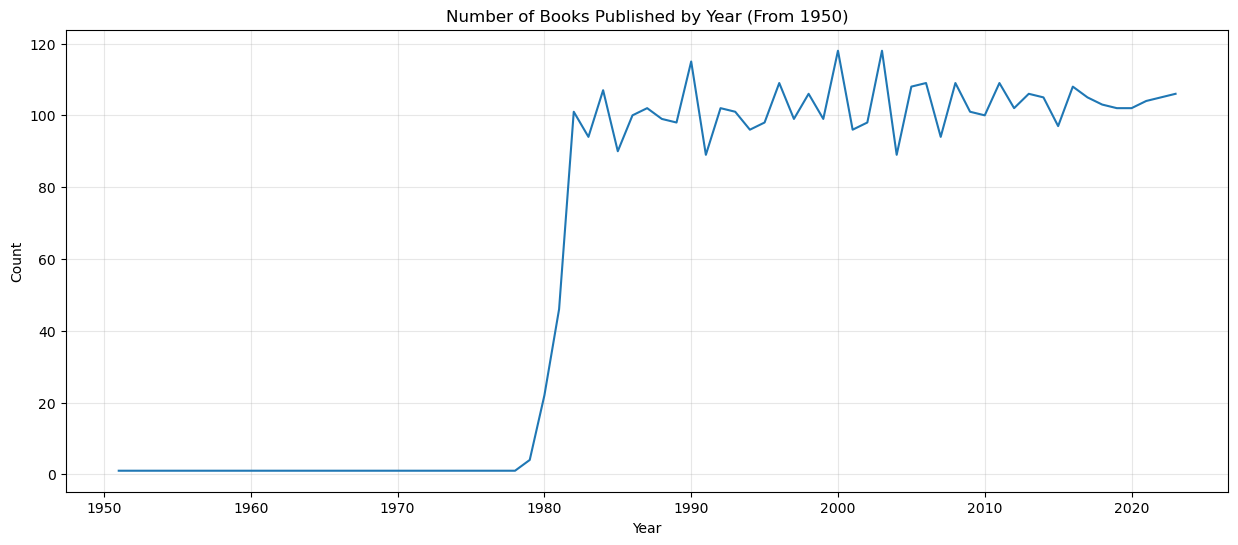

In [74]:
# Extract publication year
df['pub_year'] = pd.to_datetime(df['publication_date'], errors='coerce').dt.year

# Filter data to include only years from 1950 onwards
df_filtered = df[df['pub_year'] >= 1950]

# Number of books per year
yearly_counts = df_filtered['pub_year'].value_counts().sort_index()
plt.figure(figsize=(15, 6))
yearly_counts.plot(kind='line')
plt.title('Number of Books Published by Year (From 1950)')
plt.xlabel('Year')
plt.ylabel('Count')
plt.grid(True, alpha=0.3)
plt.show()

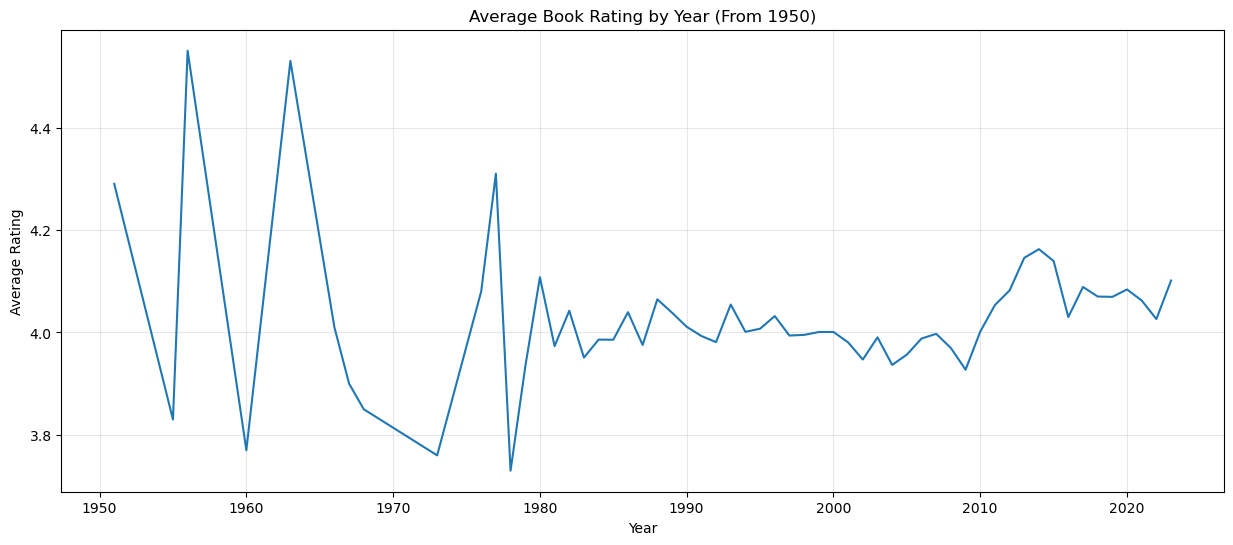

In [76]:
# Average rating by year
yearly_ratings = df_filtered.groupby('pub_year')['rating_score'].mean()
plt.figure(figsize=(15, 6))
yearly_ratings.plot(kind='line')
plt.title('Average Book Rating by Year (From 1950)')
plt.xlabel('Year')
plt.ylabel('Average Rating')
plt.grid(True, alpha=0.3)
plt.show()

In [82]:
# 6. Text Preprocessing for Description Analysis

# Function to clean text
def clean_text(text):
    """Clean and preprocess text data"""
    if isinstance(text, str):
        # Remove HTML tags
        text = re.sub(r'<.*?>', '', text)
        # Remove special characters and numbers
        text = re.sub(r'[^a-zA-Z\s]', '', text)
        # Convert to lowercase and strip
        text = text.lower().strip()
        return text
    return ""
# Apply cleaning function
df['clean_description'] = df['description'].apply(clean_text)  

# Get a sample of cleaned descriptions
print("\nSample cleaned descriptions:")
for i, desc in enumerate(df['clean_description'].head(3)):
    print(f"{i+1}. {desc[:200]}...")


Sample cleaned descriptions:
1. it was such a hot summer the sky was deep blue and the sun never falteredall along brambly hedge the mice did their best to keep cool poppy eyebright sought refuge in the mossy shadows of the mill whe...
2. martin urban is a quiet bachelor with a comfortable life free of worry and distractions when he unexpectedly comes into a small fortune he decides to use his newfound wealth to help out those in need ...
3. in book two of the heechee saga robinette broadhead is on his way to making a fortune by bankrolling an expedition to the food factorya heechee spaceship that can graze the cometary cloud and transfor...


In [86]:
# 7. Keyword Extraction and Word Clouds for Mood Analysis

# Function to create a word cloud
def create_wordcloud(text, title, stopwords=None):
    wordcloud = WordCloud(width=800, height=400, 
                         background_color='white',
                         max_words=200,
                         stopwords=stopwords).generate(text)
    
    plt.figure(figsize=(10, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.title(title)
    plt.show()

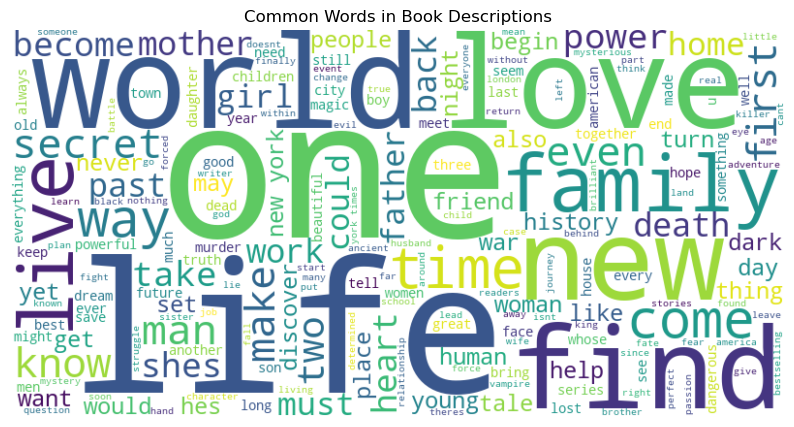

In [88]:
# Remove stopwords
stop_words = set(stopwords.words('english'))
additional_stops = {'book', 'story', 'novel', 'author', 'read', 'reader'}
stop_words.update(additional_stops)

# Create a word cloud for all descriptions
all_descriptions = ' '.join(df['clean_description'].dropna())
create_wordcloud(all_descriptions, 'Common Words in Book Descriptions', stop_words)

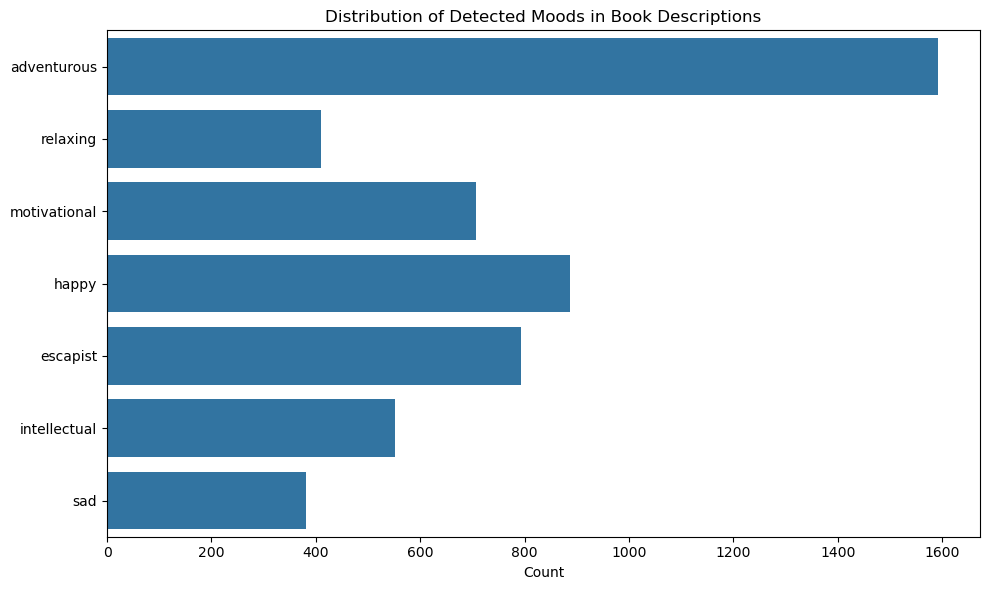

In [90]:
# 8. Mood-related keyword analysis

# Define mood-related keywords
mood_keywords = {
    'happy': ['happy', 'joy', 'funny', 'humor', 'laugh', 'comedy', 'light', 'uplifting'],
    'sad': ['sad', 'sorrow', 'grief', 'melancholy', 'tragedy', 'depressing', 'emotional'],
    'motivational': ['inspire', 'motivate', 'empower', 'success', 'achieve', 'dream', 'goal'],
    'adventurous': ['adventure', 'exciting', 'thrill', 'danger', 'journey', 'quest', 'action'],
    'relaxing': ['calm', 'relax', 'soothing', 'peace', 'gentle', 'comfort', 'quiet'],
    'intellectual': ['think', 'philosophy', 'complex', 'intelligent', 'profound', 'intellectual'],
    'escapist': ['fantasy', 'magical', 'imaginary', 'escape', 'wonder', 'enchant', 'fairy']
}

# Function to check if any mood keywords are in the text
def detect_moods(text, mood_dict):
    if not isinstance(text, str):
        return {}
    
    text = text.lower()
    mood_scores = {}
    
    for mood, keywords in mood_dict.items():
        score = sum(1 for keyword in keywords if keyword in text)
        if score > 0:
            mood_scores[mood] = score
            
    return mood_scores

# Apply mood detection to descriptions
df['mood_scores'] = df['clean_description'].apply(lambda x: detect_moods(x, mood_keywords))

# Extract moods present in each book
df['detected_moods'] = df['mood_scores'].apply(lambda x: list(x.keys()))

# Count mood occurrences
all_moods = [mood for sublist in df['detected_moods'] for mood in sublist]
mood_counts = Counter(all_moods)

# Plot mood distribution
plt.figure(figsize=(10, 6))
sns.barplot(x=list(mood_counts.values()), y=list(mood_counts.keys()))
plt.title('Distribution of Detected Moods in Book Descriptions')
plt.xlabel('Count')
plt.tight_layout()
plt.show()


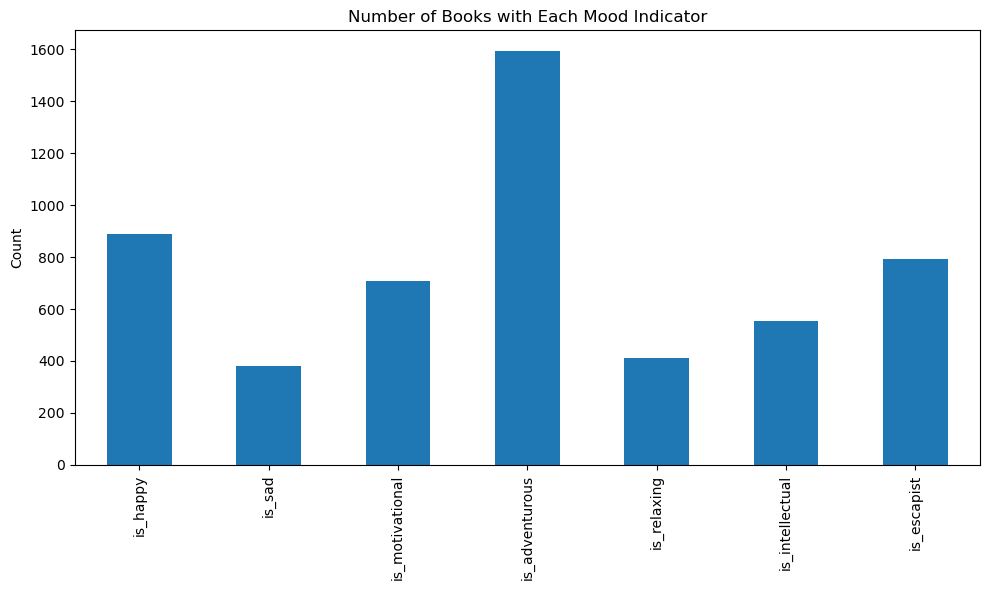

In [92]:
# 9. Initial mood classification

# Create binary indicators for each mood
for mood in mood_keywords.keys():
    df[f'is_{mood}'] = df['detected_moods'].apply(lambda x: 1 if mood in x else 0)

# Look at the distribution of mood indicators
mood_indicators = df[[f'is_{mood}' for mood in mood_keywords.keys()]].sum()
plt.figure(figsize=(10, 6))
mood_indicators.plot(kind='bar')
plt.title('Number of Books with Each Mood Indicator')
plt.ylabel('Count')
plt.tight_layout()
plt.show()


In [94]:
# 10. Create a sample dataset for mood-based recommendations

# Save the processed dataframe
df.to_csv('processed_books.csv', index=False)

print("\nDataset processed and saved as 'processed_books.csv'")
print(f"Total books: {len(df)}")
print(f"Books with mood information: {df['detected_moods'].apply(len).gt(0).sum()}")

# Check relations between moods and genres
print("\nTop genres for each mood:")

for mood in mood_keywords.keys():
    # Get books with this mood
    mood_books = df[df[f'is_{mood}'] == 1]
    
    # Get all genres for these books
    mood_genres = [genre for sublist in mood_books['genres_list'] for genre in sublist]
    top_5_genres = Counter(mood_genres).most_common(5)
    
    print(f"\n{mood.capitalize()} books - Top genres:")
    for genre, count in top_5_genres:
        print(f"  {genre}: {count}")


Dataset processed and saved as 'processed_books.csv'
Total books: 4400
Books with mood information: 3136

Top genres for each mood:

Happy books - Top genres:
  'Fiction': 427
  'Contemporary': 245
  ['Fiction': 222
  'Audiobook': 167
  'Romance': 157

Sad books - Top genres:
  'Fiction': 173
  'Contemporary': 126
  ['Fiction': 115
  'Audiobook': 76
  'Romance': 68

Motivational books - Top genres:
  'Fiction': 373
  'Contemporary': 189
  'Audiobook': 157
  ['Fiction': 140
  'Romance': 132

Adventurous books - Top genres:
  'Fiction': 932
  'Romance': 387
  ['Fantasy': 369
  'Fantasy': 313
  'Contemporary': 307

Relaxing books - Top genres:
  'Fiction': 250
  'Contemporary': 104
  'Romance': 91
  'Audiobook': 91
  ['Fantasy': 84

Intellectual books - Top genres:
  'Fiction': 277
  'Contemporary': 158
  ['Fiction': 125
  'Audiobook': 118
  'Fantasy': 98

Escapist books - Top genres:
  'Fiction': 529
  ['Fantasy': 289
  'Young Adult': 210
  'Romance': 205
  'Fantasy': 160
